# Análise de dados de criptomoedas

- O objetivo da análise é encontrar padrões, tendências de crescimento ou queda e retirar insights por meio de gráficos e tratamento de dados para fins de investimento em criptomoedas.
- Serão utilizadas métricas como média móvel em cima dos valores de fechamento e o múltiplo de Mayer para análise específica do Bitcoin.

- Lista de moedas a serem analisadas:

**Bitcoin,
Ethereum,
Solana,
Xrp,
Polkadot,
Aave,
Litecoin,
Chainlink,
Avax**

- Importando as bibliotecas necessárias e conectando com a API

In [1]:
# Importações externas
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Importações internas
from src.preprocessing import *
from src.plotting import *

ModuleNotFoundError: No module named 'seaborn'

- Constantes e configurações iniciais

In [ ]:
# Conectando com a API da Binance
BINANCE_API = ccxt.binance()

# Lista de moedas que serão analisadas
COINS = [
    "BTC/USDT",  # Bitcoin
    "ETH/USDT",  # Ethereum
    "SOL/USDT",  # Solana
    "XRP/USDT",  # XRP
    "DOT/USDT",  # Polkadot
    "AAVE/USDT",  # Aave
    "LTC/USDT",  # Litecoin
    "LINK/USDT",  # Chainlink
    "AVAX/USDT"   # Avalanche
]

- Gerando um dataframe com todas as criptomoedas necessárias

In [ ]:
# Dataframe vazio para armazenar todas as moedas
df = pd.DataFrame()
# Armazenando os dados de todas as moedas em um dataframe geral
df = generate_coins_data(df, COINS)
# Verificando se há dados faltando
df.isna().sum()
# Exibindo o dataframe geral
df

,data,moeda,close
0,2023-03-02,BTC/USDT,23465.32
1,2023-03-03,BTC/USDT,22354.34
2,2023-03-04,BTC/USDT,22346.57
3,2023-03-05,BTC/USDT,22430.24
4,2023-03-06,BTC/USDT,22410.00
...,...,...,...
6295,2025-01-25,AVAX/USDT,36.61
6296,2025-01-26,AVAX/USDT,35.75
6297,2025-01-27,AVAX/USDT,34.20
6298,2025-01-28,AVAX/USDT,32.08


- Gerando dataframes específicos, divididos em 3 grupos (Bitcoin, Ethereum e moedas restantes)

In [ ]:
# Criando o dataframe de bitcoin
bitcoin_df = df[df["moeda"] == "BTC/USDT"]
# Criando o dataframe de Ethereum
ethereum_df = df[df["moeda"] == "ETH/USDT"]
# Criando o dataframe das outras moedas
other_coins_df = df[~df["moeda"].isin(["BTC/USDT", "ETH/USDT"])]
# Exibindo o dataframe de bitcoin
bitcoin_df

,data,moeda,close
0,2023-03-02,BTC/USDT,23465.32
1,2023-03-03,BTC/USDT,22354.34
2,2023-03-04,BTC/USDT,22346.57
3,2023-03-05,BTC/USDT,22430.24
4,2023-03-06,BTC/USDT,22410.00
...,...,...,...
695,2025-01-25,BTC/USDT,104746.85
696,2025-01-26,BTC/USDT,102620.00
697,2025-01-27,BTC/USDT,102082.83
698,2025-01-28,BTC/USDT,101335.52


- Adicionando a coluna de média móvel dos últimos 200 dias nos dataframes

In [ ]:
# Adicionando a média móvel nos DataFrames
bitcoin_df = moving_average_calc(bitcoin_df)
ethereum_df = moving_average_calc(ethereum_df)
other_coins_df = moving_average_calc(other_coins_df)

# Removendo as linhas onde a média móvel está sem valor
bitcoin_df = bitcoin_df.dropna()
ethereum_df = ethereum_df.dropna()
other_coins_df = other_coins_df.dropna()

- Adicionando o Múltiplo de Mayer ao dataframe de Bitcoin

In [ ]:
# Inserindo a uma coluna com o valor do Múltiplo de Mayer no dataframe do Bitcoin
bitcoin_df = mayer_multiple(bitcoin_df)
bitcoin_df

,data,moeda,close,media_movel_200,multiplo_de_mayer
199,2023-09-17,BTC/USDT,26527.51,27707.64800,0.957407
200,2023-09-18,BTC/USDT,26762.51,27724.13395,0.965315
201,2023-09-19,BTC/USDT,27210.26,27748.41355,0.980606
202,2023-09-20,BTC/USDT,27125.00,27772.30570,0.976692
203,2023-09-21,BTC/USDT,26568.08,27792.99490,0.955927
...,...,...,...,...,...
695,2025-01-25,BTC/USDT,104746.85,76234.56870,1.374007
696,2025-01-26,BTC/USDT,102620.00,76459.03945,1.342157
697,2025-01-27,BTC/USDT,102082.83,76682.75415,1.331236
698,2025-01-28,BTC/USDT,101335.52,76899.98625,1.317757


- Salvando os dados em um arquivo CSV para análises futuras

In [ ]:
# Gerando os arquivos CSV dos 3 dataframes
bitcoin_df.to_csv(r"coins_data\bitcoin_data.csv", index=False) # Salvando os dados do bitcoin
ethereum_df.to_csv(r"coins_data\ethereum_data.csv", index=False)
other_coins_df.to_csv(r"coins_data\other_coins_data.csv", index=False)

- Visualização dos dados do Bitcoin

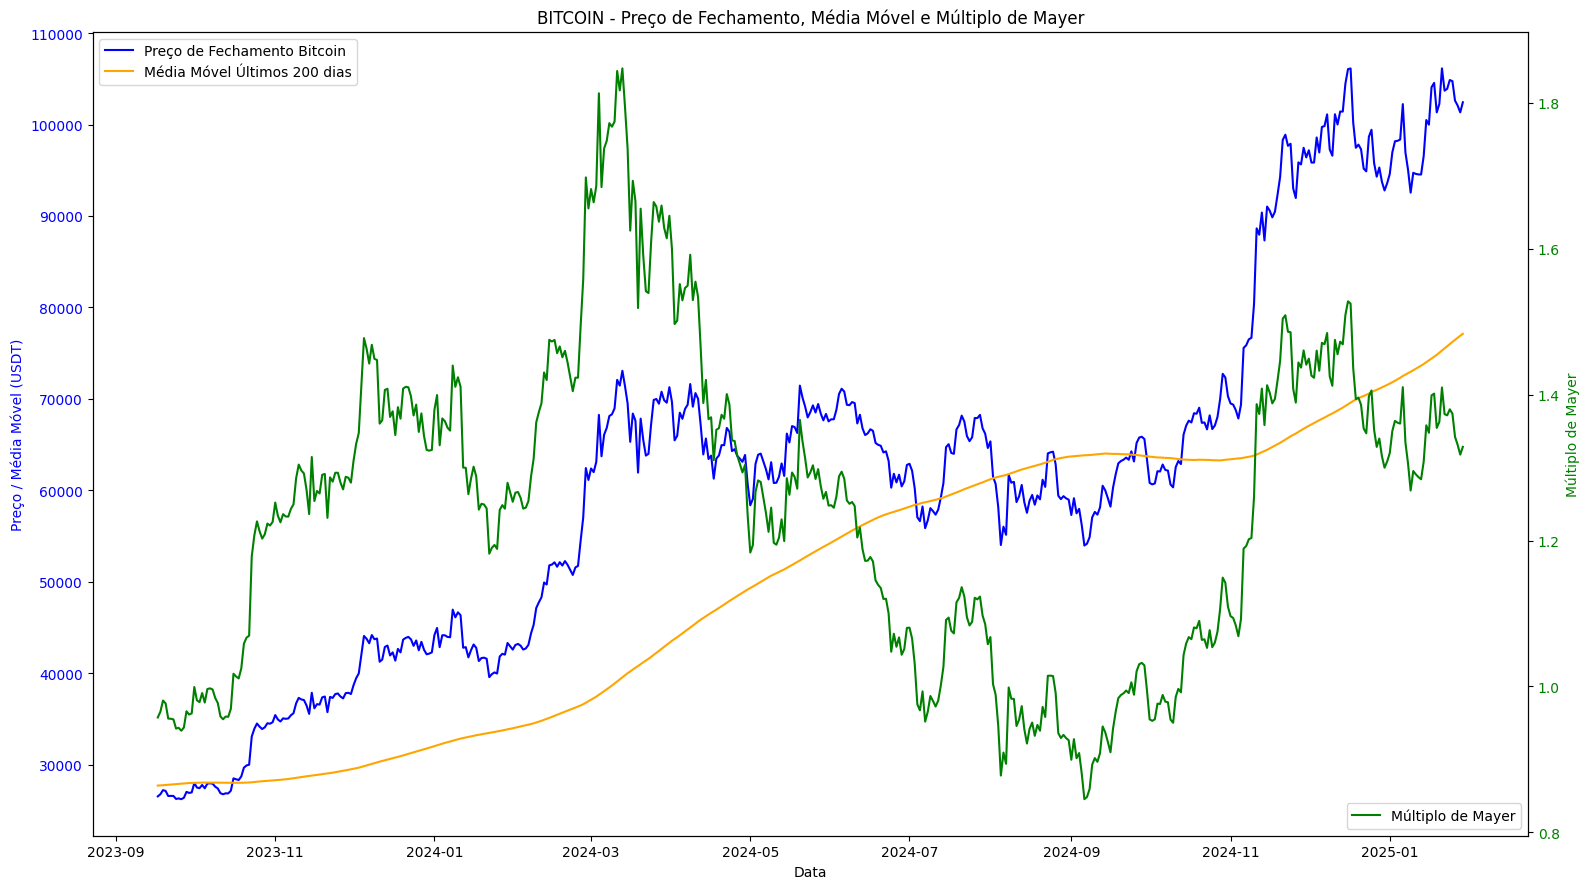

In [ ]:
plot_btc(bitcoin_df)

- Visualização de dados do Ethereum

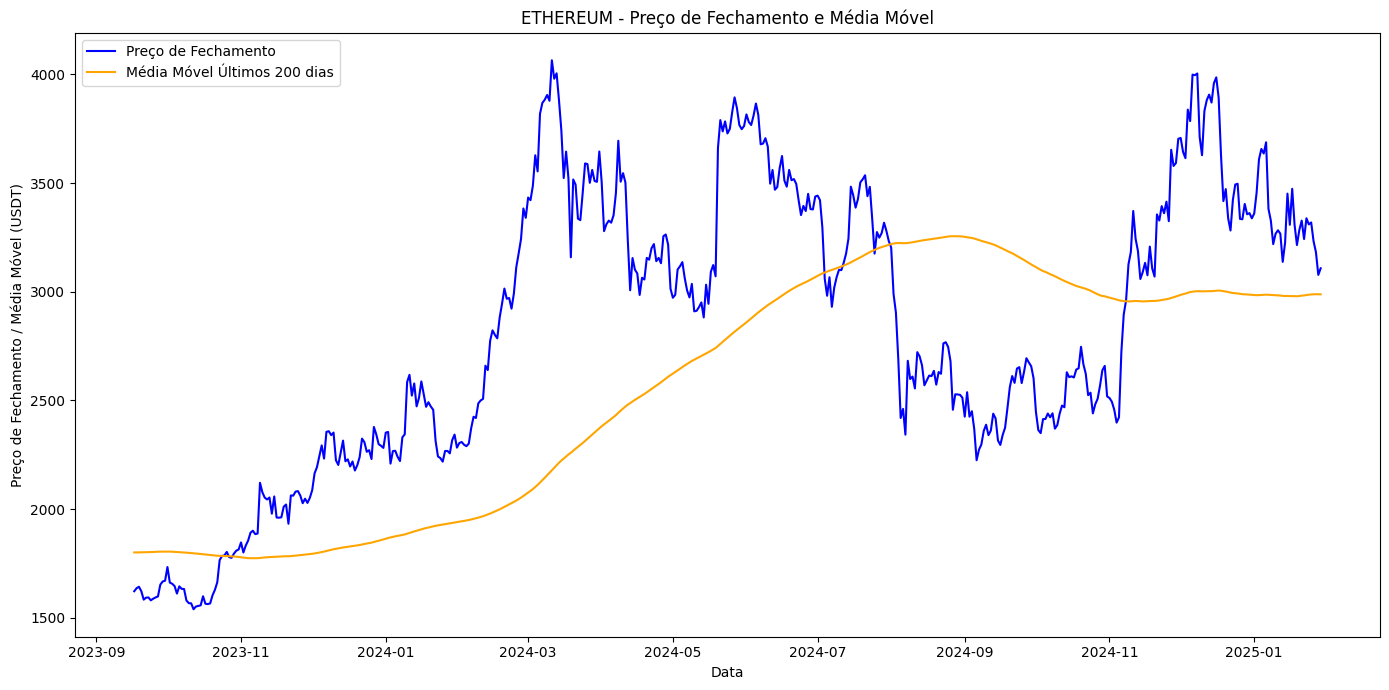

In [ ]:
plot_eth(ethereum_df)


- Visualização de dados das moedas restantes: Solana, Xrp, Polkadot, Aave, Litecoin, Chainlink, Avax

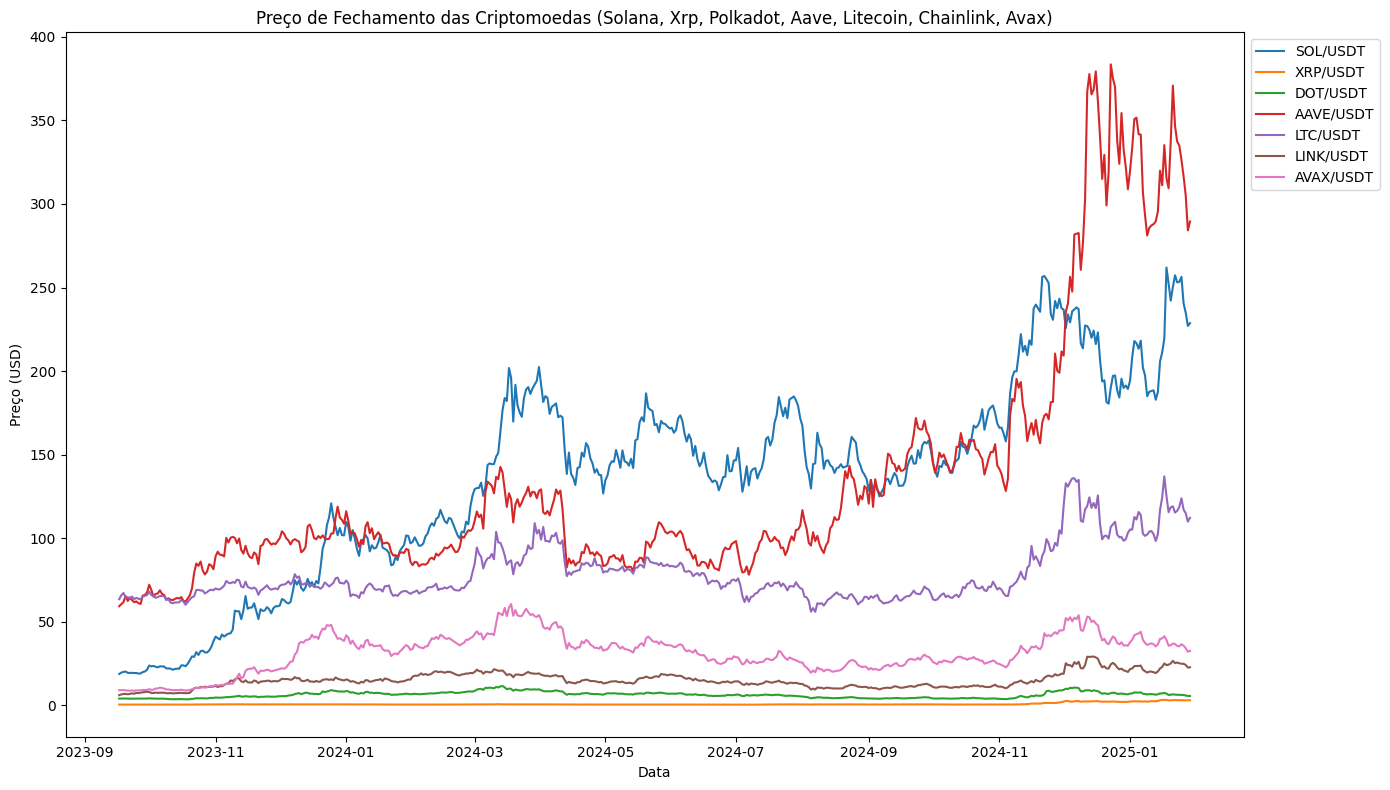

In [ ]:
# Gerando o gráfico para o preço de fechamento de todas as moedas
plot_closing_prices(other_coins_df)

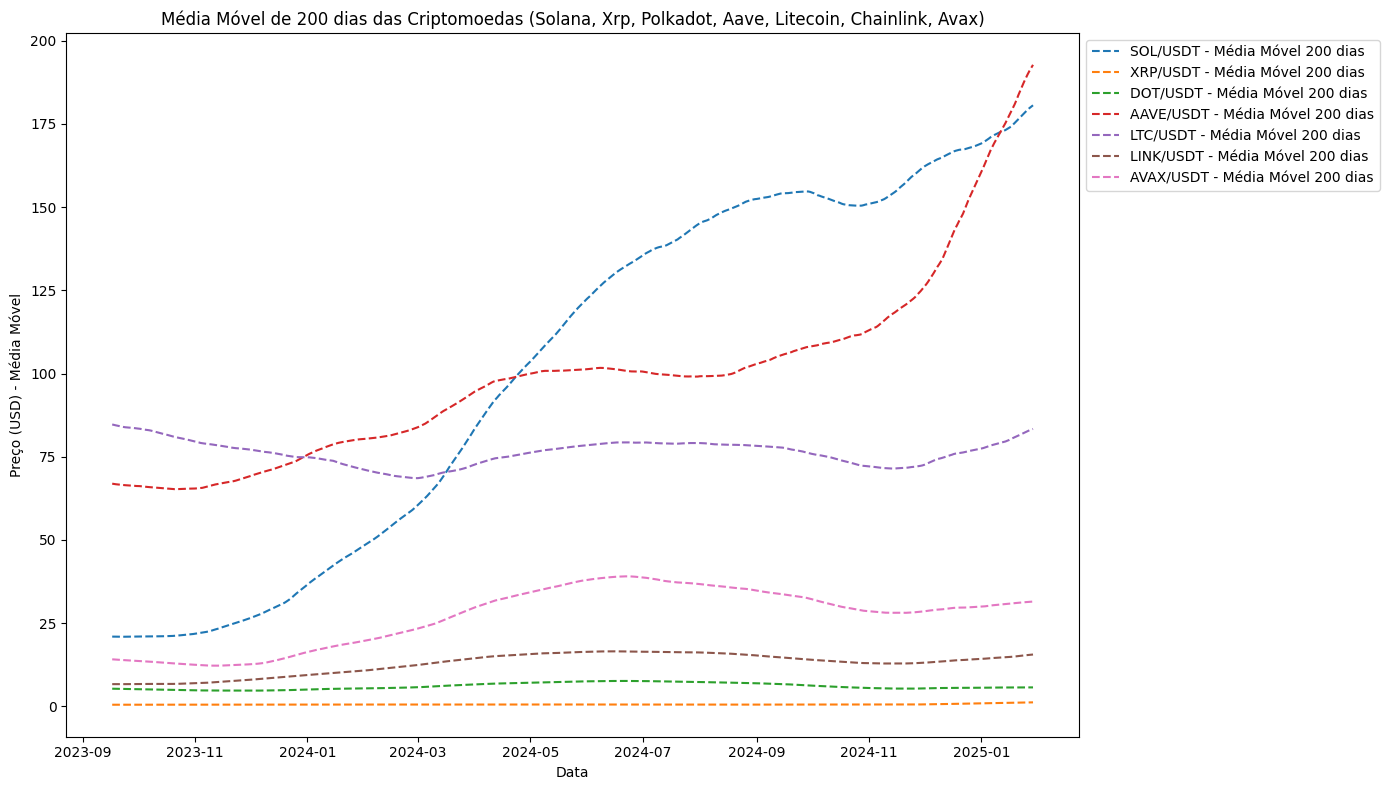

In [ ]:
# Gerando o gráfico para a média móvel de 200 dias de todas as moedas
plot_moving_averages(other_coins_df)
